/var/folders/4c/ndt61bsx3y9c7frk1ps8fmvm0000gn/T/ipykernel_10842/2621330511.py:1: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit import QuantumCircuit, transpile


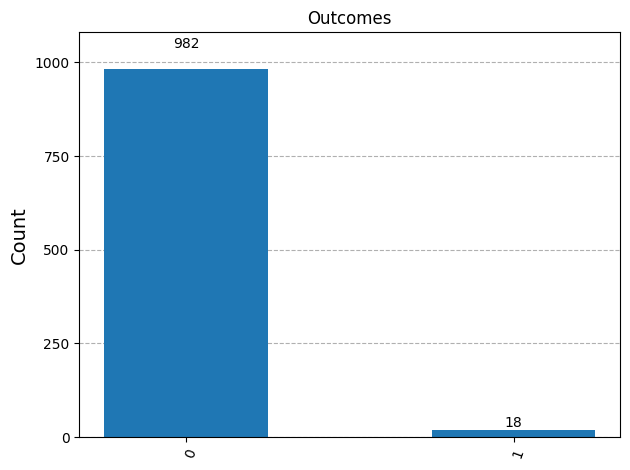

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

import numpy as np

# Create a new circuit with one qubit and one classical bit
qc = QuantumCircuit(1,1)

# Number of steps for rotation
num_steps = 100
# NOTE: In qiskit, from ket0 to ket1 is a rotation of pi, not pi/2. 
# This is comes from a different representation of qubits that physicists use, called the "Bloch Sphere".
# To translate this code's rotations into your understanding, divide by 2.
rotation_per_step = np.pi / num_steps

# Rotate from ket0 to ket1 in 100 steps
for _ in range(num_steps):
    qc.ry(rotation_per_step, 0)
    # qc.measure(0,0) # UNCOMMENT THIS LINE

qc.measure(0,0)

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Outcomes')